# Lab 1. Introduction to imagery / image processing / computer vision <a class="tocSkip">

The goal here is to learn basics of digital image processing : read and write, histogram manipulations, geometric transformations, etc

In [1]:
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt

## Importance of image dynamic when reading, writing and displaying an image

Execute the following cell and explain what happens (read the doc of function plt.imshow)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


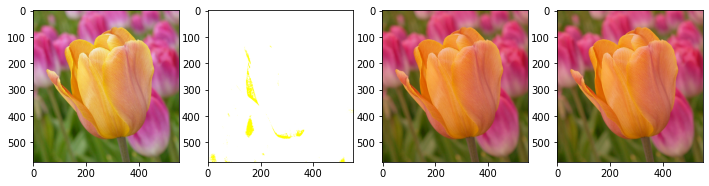

In [2]:
img = imageio.imread( 'tulip.ppm' )
img_tinted = img * [1., 0.8, 0.75]

# Show the original image. Note that img has type uint8. In this case, imshow
# expects black to be [0, 0, 0] and white to be [255, 255, 255].
fig, axes = plt.subplots(ncols=4, figsize=(12,4))
axes[0].imshow(img)

# Show the tinted image. Note that img_tinted has type float64. Now imshow
# expects black to be [0, 0, 0] and white to be [1, 1, 1]. Compare and
# interpret the three following solutions
axes[1].imshow(img_tinted)
axes[2].imshow(np.uint8(img_tinted))
axes[3].imshow(img_tinted / 255)

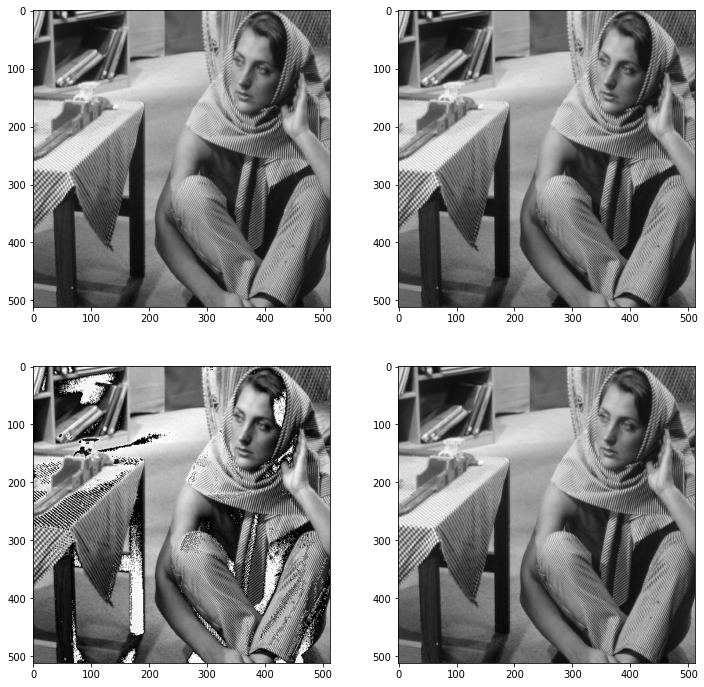

In [18]:
# Another example with a grayscale image, you will see that the behavior of plt.imshow is different
img = imageio.imread( 'barbara.pgm' )
mu = np.mean(img)
img2 = mu + 1.4*(img-mu)

# Show the original image
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].imshow(img, cmap=plt.get_cmap('gray'))

# Show the enhanced image
axes[0,1].imshow(img2, cmap=plt.get_cmap('gray'))
axes[1,0].imshow(img2.astype(np.uint8), cmap=plt.get_cmap('gray'))
axes[1,1].imshow(img2 / 255, cmap=plt.get_cmap('gray'))

## Histogram transformation

We will see here how to do simple but effective histogram manipulations, from scratch

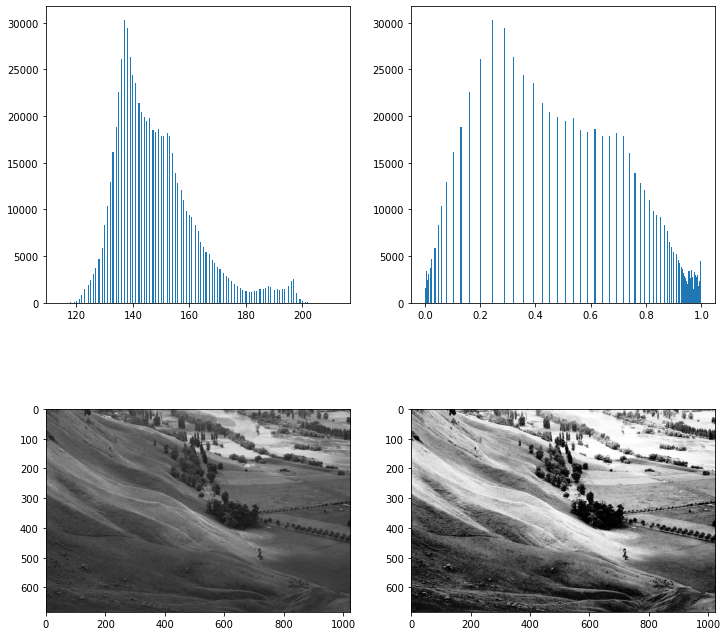

In [32]:
# Another example with a grayscale image, you will see that the behavior of plt.imshow is different
img = imageio.imread('unequalized.jpg')

# Get histogram and cumulative hist
h, _ = np.histogram(img.flatten(), bins=range(256))
hs = np.cumsum(h)/(img.size)

# Equalize histogram
img_eq = hs[img]

# Display results and histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].hist(img.flatten(), bins=256)
axes[0,1].hist(img_eq.flatten(), bins=256)
axes[1,0].imshow(img, cmap=plt.get_cmap('gray'))
axes[1,1].imshow(img_eq, cmap=plt.get_cmap('gray'))

In [33]:
img.shape, h.shape

((683, 1024), (255,))

<b>Exercise</b>: try the histogram equalization for a color image

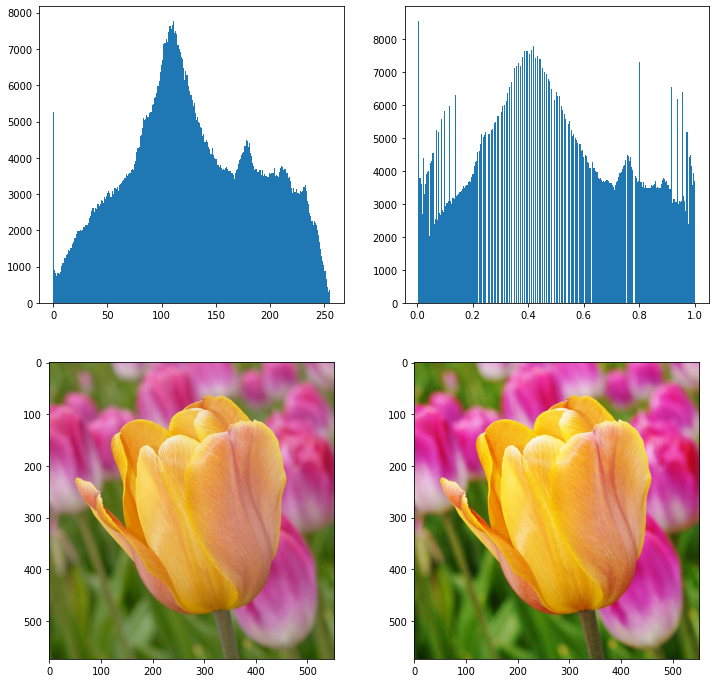

In [63]:
# Your turn
img = imageio.imread('tulip.ppm')

# Get histogram and cumulative hist
h, _ = np.histogram(img.flatten(), bins=256)
hs = np.cumsum(h)/(img.size)

# Equalize histogram
img_eq = hs[img]

# Display results and histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].hist(img.flatten(), bins=256)
axes[0,1].hist(img_eq.flatten(), bins=256)
axes[1,0].imshow(img)
axes[1,1].imshow(img_eq)

In [56]:

img[:,:,0].min(), img[:,:,0].max()

(0.0, 0.99875623)

(256,)
0 255


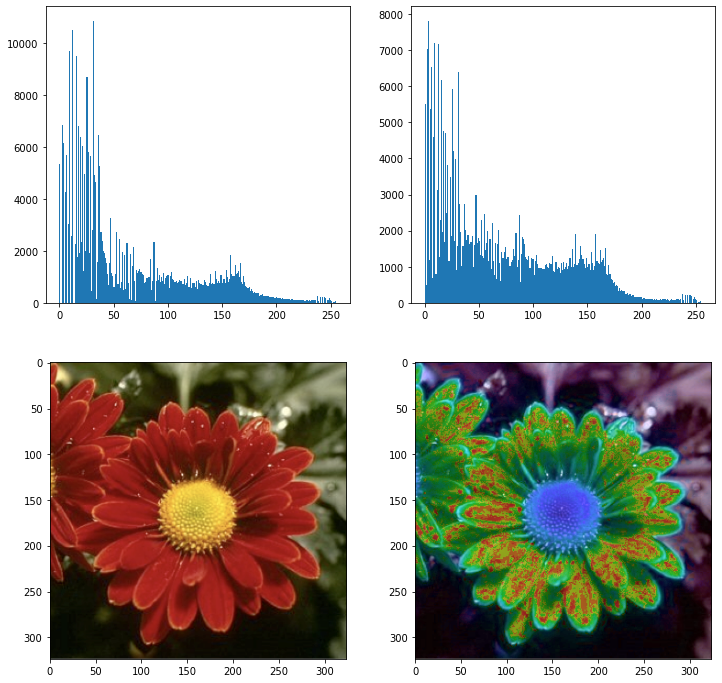

In [70]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
img = imageio.imread('fleur.png')
img = rgb_to_hsv(img)

# Get histogram and cumulative hist
lum = img[:,:,0]

h, _ = np.histogram(lum.flatten(), bins=256)
hs = np.cumsum(h)/(lum.size)

# Equalize histogram
img_eq = img.copy()
print(hs.shape)
img_eq[:,:,0] = hs[(lum*255).astype(np.uint8)]

img = hsv_to_rgb(img).astype(np.uint8)
print(img.min(), img.max())
img_eq = hsv_to_rgb(img_eq).astype(np.uint8)

# Display results and histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].hist(img.flatten(), bins=256)
axes[0,1].hist(img_eq.flatten(), bins=256)
axes[1,0].imshow(img)
axes[1,1].imshow(img_eq)

## Some geometric transformations

Will see here some simple geometric transformations applied to a color image. Do not forget that, most of the time, there is an interpolation step to sample the transformed image on the pixel grid!

From now, we will use the module opencv-python, which is a reference module for manipulating images.

In [1]:
import cv2 # Python openCV
import time

img = cv2.imread( 'tulip.ppm' ) # Read image
rows, cols, _ = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),37,1)
dst = cv2.warpAffine(img,M,(cols,rows))

#cv2.namedWindow('img', cv2.WINDOW_NORMAL) # Resizable window (optional)
cv2.imshow('img',dst)
# wait forever, if Q is pressed then close cv image window
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

<b>Exercise</b>: 
- try other geometric transformations such as scaling, projection, etc
- Try a naive subsampling on image Barbara, see the aliasing effect
- Do a proper subsampling with opencv

(128, 128, 3)


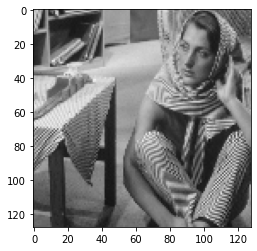

In [43]:
# Your turn    
img = cv2.imread('barbara.pgm')
plt.imshow(img)
img2 = np.zeros((128,128,3)).astype(np.uint8)
for i in range(img.shape[0]):
    if i%4==0:
        for j in range(img.shape[1]):
            if j%4==0:
                img2[int(i/4), int(j/4)] = img[i,j]
print(img2.shape)
plt.imshow(img2)

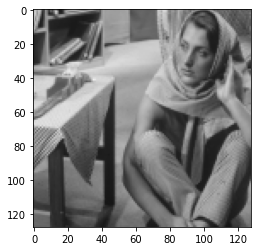

In [25]:
plt.imshow(cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA))

## Image filtering
We will observe here the effect of simple filters
- Gradient and Laplacian
- Smoothing filters: Uniform, median, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

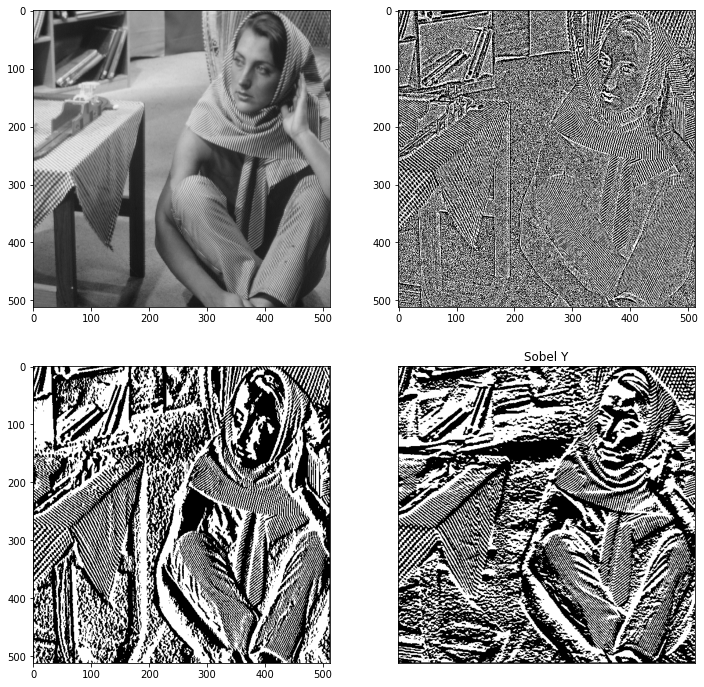

In [44]:
# Read a JPEG image
img = cv2.imread( 'barbara.pgm' )

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
axes[0,1].imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
axes[1,0].imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
axes[1,1].imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Bilateral'), ([], []), ([], []))

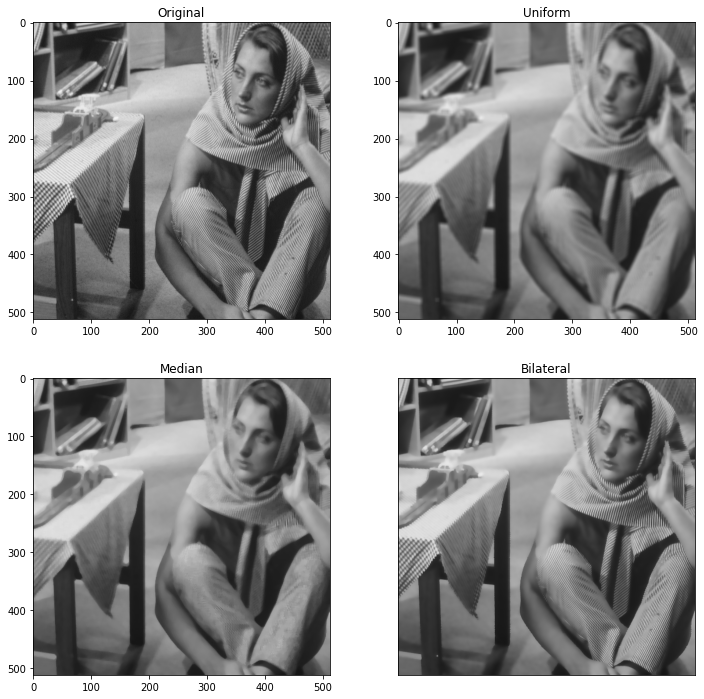

In [47]:
img = cv2.imread( 'barbara.pgm' )
# img = np.float32(img[:,:,1]) + 20*np.random.randn(img.shape[0], img.shape[1]) # Add noise to the image
p = 7 # size of the filter

# Uniform filtering
kernel = np.ones((p,p),np.float32)/p/p
unif = cv2.filter2D(img,-1,kernel)

# Median filtering
median = cv2.medianBlur(img.astype('uint8'),p)

# Bilateral filter
bilat = cv2.bilateralFilter(img.astype('float32'),9,75,75)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].imshow(img/255,cmap = 'gray')
axes[0,0].set_title('Original'), plt.xticks([]), plt.yticks([])
axes[0,1].imshow(unif/255,cmap = 'gray')
axes[0,1].set_title('Uniform'), plt.xticks([]), plt.yticks([])
axes[1,0].imshow(median,cmap = 'gray')
axes[1,0].set_title('Median'), plt.xticks([]), plt.yticks([])
axes[1,1].imshow(bilat/255,cmap = 'gray')
axes[1,1].set_title('Bilateral'), plt.xticks([]), plt.yticks([])

<b>Exercise</b>: try other filtering techniques, such as non-local means, which is a good denoising technique

In [ ]:
# Your turn

## JPEG images
Look at the image below : can you observe the blocking artefacts caused by the block DCT quantization in JPEG? Chack that this is particularly visible around the edges, since there are many high frequencies there.

In [1]:
import cv2
import time
img = cv2.imread( 'flower.jpg' ) # Read image

cv2.namedWindow('img', cv2.WINDOW_NORMAL) # Resizable window (optional)
cv2.imshow('img',img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

# wait = True
# while wait:
#     wait = cv2.waitKey()=='q113' # hit q to exit